In [1]:
# !pip install -r requirements.txt

In [2]:
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

# Pirma dalis

## 1-2. Duomenų skaitymas

In [3]:
df_BLNS_2020 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2020.csv"
)
df_BLNS_2021 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2021.csv"
)

# Išmetame paskutinį stulpelį (dokumento formavimo datą)
df_BLNS_2020 = df_BLNS_2020.iloc[:, :-1]
df_BLNS_2021 = df_BLNS_2021.iloc[:, :-1]

df_BLNS_2021.sample(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas
22424,304431353,"MB ""Finansų idėjos""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2019-01-01,2019-12-31,2021-05-16,8284.0,NaN,676.0,7636.0
60332,174960681,"Uždaroji akcinė bendrovė ""Kęsminta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),2020-01-01,2020-12-31,2021-03-02,-167850.0,610943.0,424120.0,18083.0
104476,304771548,"UAB ""Balta manija""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),2020-01-01,2020-12-31,2021-05-12,-1353.0,4933.0,0.0,3580.0
51251,304849623,"MB ""Techniniai projektai""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2020-01-01,2020-12-31,2021-05-25,22261.0,NaN,0.0,29082.0
117918,275021220,"Uždaroji akcinė bendrovė ""Brodenta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2020-01-01,2020-12-31,2021-04-16,11835.0,353.0,7302.0,4886.0


<IPython.core.display.Javascript object>

In [4]:
df_PLNA_2020 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2020.csv"
)
df_PLNA_2021 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2021.csv"
)

# Išmetame paskutinį stulpelį (dokumento formavimo datą)
df_PLNA_2020 = df_PLNA_2020.iloc[:, :-1]
df_PLNA_2021 = df_PLNA_2021.iloc[:, :-1]

df_PLNA_2021.sample(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos
69762,304719875,"UAB ""Vygora""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-03-31,445.0,391.0,NaN
88933,304716676,"UAB ""Kaimelis""",310,Uždaroji akcinė bendrovė,26,Likviduojamas dėl bankroto,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-06-01,-20823.0,-20823.0,19403.0
107539,301507422,"UAB ""DASBASAS""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-01,2020-12-31,2021-04-29,NaN,-1717.0,19973.0
100431,302590296,"UAB ""Luca""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-05-07,-30125.0,-30125.0,10160.0
78780,304430568,"UAB ""Agrojoris""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-12-15,-91.0,-91.0,NaN


<IPython.core.display.Javascript object>

## 3. Duomenų informacija

### 3.a. Ką reiškia skirtingi duomenų laukai? Iš kokių atributų sudaryti duomenys?

Skirtingi duomenų laukai duoda skirtingą informaciją apie imonę (įrašo lygmenyje)

In [5]:
df_BLNS_2020.dtypes

obj_kodas                         int64
obj_pav                          object
form_kodas                        int64
form_pav                         object
stat_statusas                     int64
stat_pav                         object
template_id                      object
template_name                    object
standard_id                      object
standard_name                    object
laikotarpis_nuo                  object
laikotarpis_iki                  object
reg_date                         object
nuosavas_kapitalas              float64
mok_sumos_ir_isipareigojimai    float64
ilgalaikis_turtas               float64
trumpalaikis_turtas             float64
dtype: object

<IPython.core.display.Javascript object>

In [6]:
df_BLNS_2021.dtypes

obj_kodas                         int64
obj_pav                          object
form_kodas                        int64
form_pav                         object
stat_statusas                     int64
stat_pav                         object
template_id                      object
template_name                    object
standard_id                      object
standard_name                    object
laikotarpis_nuo                  object
laikotarpis_iki                  object
reg_date                         object
nuosavas_kapitalas              float64
mok_sumos_ir_isipareigojimai    float64
ilgalaikis_turtas               float64
trumpalaikis_turtas             float64
dtype: object

<IPython.core.display.Javascript object>

In [7]:
df_PLNA_2020.dtypes

obj_kodas                       int64
obj_pav                        object
form_kodas                      int64
form_pav                       object
stat_statusas                   int64
stat_pav                       object
template_id                    object
template_name                  object
standard_id                    object
standard_name                  object
laikotarpis_nuo                object
laikotarpis_iki                object
reg_date                       object
pelnas_pries_apmokestinima    float64
grynasis_pelnas               float64
pardavimo_pajamos             float64
dtype: object

<IPython.core.display.Javascript object>

In [8]:
df_PLNA_2021.dtypes

obj_kodas                       int64
obj_pav                        object
form_kodas                      int64
form_pav                       object
stat_statusas                   int64
stat_pav                       object
template_id                    object
template_name                  object
standard_id                    object
standard_name                  object
laikotarpis_nuo                object
laikotarpis_iki                object
reg_date                       object
pelnas_pries_apmokestinima    float64
grynasis_pelnas               float64
pardavimo_pajamos             float64
dtype: object

<IPython.core.display.Javascript object>

### 3.b. Kiek reikšmių ir požymių turi kiekvienas iš dokumentų?

In [9]:
df_BLNS_2020.shape

(106318, 17)

<IPython.core.display.Javascript object>

In [10]:
df_BLNS_2021.shape

(120850, 17)

<IPython.core.display.Javascript object>

In [11]:
df_PLNA_2020.shape

(96616, 16)

<IPython.core.display.Javascript object>

In [12]:
df_PLNA_2021.shape

(110227, 16)

<IPython.core.display.Javascript object>

### 3.c. Kokio duomenų tipo yra kiekvienas iš požymių? Ar duomenų tipai tarp atitinkamų lentelių iš 2020 ir 2021 metų sutampa?

In [13]:
df_BLNS_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106318 entries, 0 to 106317
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   obj_kodas                     106318 non-null  int64  
 1   obj_pav                       106318 non-null  object 
 2   form_kodas                    106318 non-null  int64  
 3   form_pav                      106318 non-null  object 
 4   stat_statusas                 106318 non-null  int64  
 5   stat_pav                      106318 non-null  object 
 6   template_id                   106318 non-null  object 
 7   template_name                 106318 non-null  object 
 8   standard_id                   106318 non-null  object 
 9   standard_name                 106318 non-null  object 
 10  laikotarpis_nuo               106318 non-null  object 
 11  laikotarpis_iki               106318 non-null  object 
 12  reg_date                      106318 non-nul

<IPython.core.display.Javascript object>

In [14]:
df_BLNS_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120850 entries, 0 to 120849
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   obj_kodas                     120850 non-null  int64  
 1   obj_pav                       120850 non-null  object 
 2   form_kodas                    120850 non-null  int64  
 3   form_pav                      120850 non-null  object 
 4   stat_statusas                 120850 non-null  int64  
 5   stat_pav                      120850 non-null  object 
 6   template_id                   120850 non-null  object 
 7   template_name                 120850 non-null  object 
 8   standard_id                   120850 non-null  object 
 9   standard_name                 120850 non-null  object 
 10  laikotarpis_nuo               120850 non-null  object 
 11  laikotarpis_iki               120850 non-null  object 
 12  reg_date                      120850 non-nul

<IPython.core.display.Javascript object>

In [15]:
df_PLNA_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96616 entries, 0 to 96615
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   obj_kodas                   96616 non-null  int64  
 1   obj_pav                     96616 non-null  object 
 2   form_kodas                  96616 non-null  int64  
 3   form_pav                    96616 non-null  object 
 4   stat_statusas               96616 non-null  int64  
 5   stat_pav                    96616 non-null  object 
 6   template_id                 96616 non-null  object 
 7   template_name               96616 non-null  object 
 8   standard_id                 96616 non-null  object 
 9   standard_name               96616 non-null  object 
 10  laikotarpis_nuo             96616 non-null  object 
 11  laikotarpis_iki             96616 non-null  object 
 12  reg_date                    96616 non-null  object 
 13  pelnas_pries_apmokestinima  662

<IPython.core.display.Javascript object>

In [16]:
df_PLNA_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110227 entries, 0 to 110226
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   obj_kodas                   110227 non-null  int64  
 1   obj_pav                     110227 non-null  object 
 2   form_kodas                  110227 non-null  int64  
 3   form_pav                    110227 non-null  object 
 4   stat_statusas               110227 non-null  int64  
 5   stat_pav                    110227 non-null  object 
 6   template_id                 110227 non-null  object 
 7   template_name               110227 non-null  object 
 8   standard_id                 110227 non-null  object 
 9   standard_name               110227 non-null  object 
 10  laikotarpis_nuo             110227 non-null  object 
 11  laikotarpis_iki             110227 non-null  object 
 12  reg_date                    110227 non-null  object 
 13  pelnas_pries_a

<IPython.core.display.Javascript object>

Duomenų tipų palyginimas tarp atitinkamų lentelių

In [17]:
df_BLNS_2020.info() == df_BLNS_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106318 entries, 0 to 106317
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   obj_kodas                     106318 non-null  int64  
 1   obj_pav                       106318 non-null  object 
 2   form_kodas                    106318 non-null  int64  
 3   form_pav                      106318 non-null  object 
 4   stat_statusas                 106318 non-null  int64  
 5   stat_pav                      106318 non-null  object 
 6   template_id                   106318 non-null  object 
 7   template_name                 106318 non-null  object 
 8   standard_id                   106318 non-null  object 
 9   standard_name                 106318 non-null  object 
 10  laikotarpis_nuo               106318 non-null  object 
 11  laikotarpis_iki               106318 non-null  object 
 12  reg_date                      106318 non-nul

True

<IPython.core.display.Javascript object>

__Išvada__: duomenų tipai skirtingose lentelėse sutampa

In [18]:
df_PLNA_2020.info() == df_PLNA_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96616 entries, 0 to 96615
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   obj_kodas                   96616 non-null  int64  
 1   obj_pav                     96616 non-null  object 
 2   form_kodas                  96616 non-null  int64  
 3   form_pav                    96616 non-null  object 
 4   stat_statusas               96616 non-null  int64  
 5   stat_pav                    96616 non-null  object 
 6   template_id                 96616 non-null  object 
 7   template_name               96616 non-null  object 
 8   standard_id                 96616 non-null  object 
 9   standard_name               96616 non-null  object 
 10  laikotarpis_nuo             96616 non-null  object 
 11  laikotarpis_iki             96616 non-null  object 
 12  reg_date                    96616 non-null  object 
 13  pelnas_pries_apmokestinima  662

True

<IPython.core.display.Javascript object>

__Išvada__: duomenų tipai skirtingose lentelėse sutampa

### 3.d. Paaiškinkite kas yra object duomenų tipas ir kuo jis skiriasi nuo string duomenų tipo.

_string_ tipas apibrėžia tik tekstinio tipo reikšmes, o _object_ tipo kintamais gali įgyti bet kokio tipo reikšmes (tekstas, skaičius, datas, tušias, neapibrėžtas, ... reikšmes)

### 3.e. Kuri lentelė turi daugiausiai nežinomų verčių? Kuris požymis išsiskiria nežinomų verčių skaičiumi?

In [19]:
print(
    f"Lentelės BLNS_2020 nežinomų reikšmių skaičius: {df_BLNS_2020.isna().sum().sum()}"
)
print(
    f"Lentelės BLNS_2021 nežinomų reikšmių skaičius: {df_BLNS_2021.isna().sum().sum()}"
)
print(
    f"Lentelės PLNA_2020 nežinomų reikšmių skaičius: {df_PLNA_2020.isna().sum().sum()}"
)
print(
    f"Lentelės PLNA_2021 nežinomų reikšmių skaičius: {df_PLNA_2021.isna().sum().sum()}"
)

Lentelės BLNS_2020 nežinomų reikšmių skaičius: 17013
Lentelės BLNS_2021 nežinomų reikšmių skaičius: 24187
Lentelės PLNA_2020 nežinomų reikšmių skaičius: 47606
Lentelės PLNA_2021 nežinomų reikšmių skaičius: 55858


<IPython.core.display.Javascript object>

__Išvada__: Daugiausiai tusčių reišmių iš duotų lentelių turi PLNA_2021 (_2021 m. pateiktų pelno (nuostolių) ataskaitų duomenys_)

### 3.f. Ar kažkuri lentelė turi pasikartojančių duomenų?

In [20]:
df_BLNS_2020_group = df_BLNS_2020.groupby(
    df_BLNS_2020.columns.tolist(), as_index=False
).size()
df_BLNS_2020_group["size"].sort_values(ascending=False).head()

0        1
61357    1
61377    1
61376    1
61375    1
Name: size, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
df_BLNS_2021_group = df_BLNS_2021.groupby(
    df_BLNS_2021.columns.tolist(), as_index=False
).size()
df_BLNS_2021_group["size"].sort_values(ascending=False).head()

0        1
66970    1
66968    1
66967    1
66966    1
Name: size, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
df_PLNA_2020_group = df_PLNA_2020.groupby(
    df_PLNA_2020.columns.tolist(), as_index=False
).size()
df_PLNA_2020_group["size"].sort_values(ascending=False).head()

0        1
38978    1
38980    1
38981    1
38982    1
Name: size, dtype: int64

<IPython.core.display.Javascript object>

In [23]:
df_PLNA_2021_group = df_PLNA_2020.groupby(
    df_PLNA_2021.columns.tolist(), as_index=False
).size()
df_PLNA_2021_group["size"].sort_values(ascending=False).head()

0        1
38978    1
38980    1
38981    1
38982    1
Name: size, dtype: int64

<IPython.core.display.Javascript object>

__Išvada__: Nei viena lentelė neturi pasikartojančių įrašų

#### Kokia stulpelių aibė vienareikšmiškai identifikuoja kiekvienos lentelės eilutę?

In [24]:
df_BLNS_2020.columns

Index(['obj_kodas', 'obj_pav', 'form_kodas', 'form_pav', 'stat_statusas',
       'stat_pav', 'template_id', 'template_name', 'standard_id',
       'standard_name', 'laikotarpis_nuo', 'laikotarpis_iki', 'reg_date',
       'nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai',
       'ilgalaikis_turtas', 'trumpalaikis_turtas'],
      dtype='object')

<IPython.core.display.Javascript object>

In [25]:
len(df_BLNS_2020), len(
    df_BLNS_2020[["obj_kodas", "obj_pav", "laikotarpis_iki"]].drop_duplicates()
), len(df_BLNS_2020[["obj_kodas", "obj_pav", "laikotarpis_nuo"]].drop_duplicates())

(106318, 106318, 106318)

<IPython.core.display.Javascript object>

In [26]:
len(df_BLNS_2021), len(
    df_BLNS_2021[["obj_kodas", "obj_pav", "laikotarpis_iki"]].drop_duplicates()
), len(df_BLNS_2021[["obj_kodas", "obj_pav", "laikotarpis_nuo"]].drop_duplicates())

(120850, 120850, 120850)

<IPython.core.display.Javascript object>

__Išvada__: Lentelių df_BLNS_2020, df_BLNS_2021 duomenų identifikavimui užtenka 3 stulpelių: _obj_kodas_, _obj_pav_, _laikotarpis_iki_ arba _obj_kodas_, _obj_pav_, _laikotarpis_nuo_

In [27]:
df_PLNA_2020.columns

Index(['obj_kodas', 'obj_pav', 'form_kodas', 'form_pav', 'stat_statusas',
       'stat_pav', 'template_id', 'template_name', 'standard_id',
       'standard_name', 'laikotarpis_nuo', 'laikotarpis_iki', 'reg_date',
       'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos'],
      dtype='object')

<IPython.core.display.Javascript object>

In [28]:
len(df_PLNA_2020), len(
    df_PLNA_2020[["obj_kodas", "obj_pav", "laikotarpis_iki"]].drop_duplicates()
), len(df_PLNA_2020[["obj_kodas", "obj_pav", "laikotarpis_nuo"]].drop_duplicates())

(96616, 96616, 96616)

<IPython.core.display.Javascript object>

In [29]:
len(df_PLNA_2021), len(
    df_PLNA_2021[["obj_kodas", "obj_pav", "laikotarpis_iki"]].drop_duplicates()
), len(df_PLNA_2021[["obj_kodas", "obj_pav", "laikotarpis_nuo"]].drop_duplicates())

(110227, 110227, 110227)

<IPython.core.display.Javascript object>

__Išvada__: Lentelių df_PLNA_2020, df_PLNA_2021 duomenų identifikavimui užtenka 3 stulpelių: _obj_kodas_, _obj_pav_, _laikotarpis_iki_ arba _obj_kodas_, _obj_pav_, _laikotarpis_nuo_

# Antra dalis

## 4. Keletas juridinių asmenų pavadinimų yra tiesiogiai susiję su “Thermo Fisher” bendrove. Raskite pilnus šių bendrovių pavadinimus.

In [30]:
df_BLNS_2020.loc[df_BLNS_2020["obj_pav"].str.contains("Thermo Fisher", case=False)][
    "obj_pav"
].to_list()

['UAB "Thermo Fisher Scientific Vector Holdings"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings II"']

<IPython.core.display.Javascript object>

In [31]:
df_BLNS_2021.loc[df_BLNS_2021["obj_pav"].str.contains("Thermo Fisher", case=False)][
    "obj_pav"
].to_list()

['UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Thermo Fisher Scientific Vector Holdings"']

<IPython.core.display.Javascript object>

In [32]:
df_PLNA_2020.loc[df_PLNA_2020["obj_pav"].str.contains("Thermo Fisher", case=False)][
    "obj_pav"
].to_list()

['UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Vector Holdings"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
 'UAB "Thermo Fisher Scientific Baltics"']

<IPython.core.display.Javascript object>

In [33]:
df_PLNA_2021.loc[df_PLNA_2021["obj_pav"].str.contains("Thermo Fisher", case=False)][
    "obj_pav"
].to_list()

['UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
 'UAB "Thermo Fisher Scientific Vector Holdings"']

<IPython.core.display.Javascript object>

__Išvada__: visose duomenyse yra 4 įmonės, susijusios su “Thermo Fisher”

## 5. Apsimeskime, kad atributas “form_pav” neegzistuoja. Iš likusių laukelių gaukite visas UAB ir MB bendroves. Palyginkite rekonstrukcijos tikslumą su “form_pav” vertėmis - kiek procentų verčių pavyko atkurti skirtingose duomenyse?

In [34]:
df_BLNS_2020.sample(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas
31350,301694395,"UAB ""Riktė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-06-02,-10367.0,73389.0,21429.0,41593.0
82061,126172499,"Viešoji įstaiga ""Cinerama""",570,Viešoji įstaiga,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,2019-01-01,2019-12-31,2020-06-26,-1535.0,8099.0,1.0,6563.0
70984,304795360,"UAB ""Baltijos selektas""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-04-28,-2396.0,17894.0,10088.0,5410.0
7647,300111007,"UAB ""AGM""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-07-27,-25014.0,59902.0,28355.0,5373.0
1556,304717027,"MB ""Ekokompiuteriai""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2019-01-01,2019-12-31,2020-12-23,12100.0,NaN,3059.0,15662.0


<IPython.core.display.Javascript object>

In [35]:
def is_MB_UAB(x):
    if "UAB" in x:
        return "UAB"
    if "Uždaroji akcinė bendrovė" in x:
        return "UAB"
    elif "MB" in x:
        return "MB"
    elif "Mažoji bendrija" in x:
        return "MB"
    return np.NaN


def MB_UAB_procentas(df):
    df_BLNS_2020_temp = df[["obj_pav"]].copy()

    df_BLNS_2020_temp["forma"] = df_BLNS_2020_temp["obj_pav"].apply(is_MB_UAB)
    rez_pagal_pav = df_BLNS_2020_temp["forma"].value_counts().sum()

    MB_UAB = "|".join(["Mažoji bendrija", "Uždaroji akcinė bendrovė"])
    rez_pagal_forma = df["form_pav"].str.contains(MB_UAB).sum()

    proc = rez_pagal_pav / rez_pagal_forma * 100

    return proc

<IPython.core.display.Javascript object>

In [36]:
print(f"df_BLNS_2020 sutapimas: {MB_UAB_procentas(df_BLNS_2020):.2f}")
print(f"df_BLNS_2021 sutapimas: {MB_UAB_procentas(df_BLNS_2021):.2f}")
print(f"df_PLNA_2020 sutapimas: {MB_UAB_procentas(df_PLNA_2020):.2f}")
print(f"df_PLNA_2021 sutapimas: {MB_UAB_procentas(df_PLNA_2021):.2f}")

df_BLNS_2020 sutapimas: 99.07
df_BLNS_2021 sutapimas: 99.15
df_PLNA_2020 sutapimas: 99.05
df_PLNA_2021 sutapimas: 99.14


<IPython.core.display.Javascript object>

## 6. Apskaičiuoti vidutinias reikšmes “pelnas_pries_apmokestinima” ir “nuosavas_kapitalas” laukų kiekvienai juridinio asmens formai (Uždaroji akcinė bendrovė, Mažoji bendrija, etc.) už visą laikotarpį (2020 ir 2021 metai kartu). 

Nuosavo kapitalo vidurkis pagal juridinio asmens formą

In [37]:
df_BLNS = pd.concat([df_BLNS_2020, df_BLNS_2021])[
    ["obj_pav", "form_pav", "nuosavas_kapitalas"]
]
df_BLNS.groupby(["form_pav"])[["nuosavas_kapitalas"]].mean()

,nuosavas_kapitalas
form_pav,
Akcinė bendrovė,4.139755e+07
Asociacija,3.629303e+04
Bendrija,4.739000e+03
Biudžetinė įstaiga,1.410740e+05
Individuali įmonė,1.246245e+05
Komanditinė ūkinė bendrija,3.251404e+06
Kooperatinė bendrovė,6.773609e+05
Labdaros ir paramos fondas,3.124865e+04
"Lietuvos prekyb.,pramon. rūmų asociacija",6.449100e+04


<IPython.core.display.Javascript object>

----
Pelno pries mokesčius vidurkis pagal juridinio asmens formą

In [38]:
df_PLNA = pd.concat([df_PLNA_2020, df_PLNA_2021])[
    ["form_pav", "pelnas_pries_apmokestinima"]
]
df_PLNA.groupby(["form_pav"])[["pelnas_pries_apmokestinima"]].mean()

,pelnas_pries_apmokestinima
form_pav,
Akcinė bendrovė,2.894379e+06
Asociacija,-2.975732e+02
Biudžetinė įstaiga,1.624200e+04
Individuali įmonė,1.500832e+04
Komanditinė ūkinė bendrija,3.292979e+05
Kooperatinė bendrovė,4.692872e+04
Labdaros ir paramos fondas,5.445789e+02
"Lietuvos prekyb.,pramon. rūmų asociacija",NaN
Mažoji bendrija,7.051326e+03


<IPython.core.display.Javascript object>

## 7. Atrinkti unikalias UAB ir MB įmones, kurių “nuosavas_kapitalas” buvo didesnis negu visų UAB ir MB įmonių nuosavo kapitalo mediana už visą laitotarpį (2020 ir 2021 metai kartu). 

In [39]:
MB_UAB_median = df_BLNS.groupby(["form_pav"])[["nuosavas_kapitalas"]].median()
df_BLNS_median = pd.merge(
    df_BLNS, MB_UAB_median, on="form_pav", suffixes=("_existing", "_median")
)

MB_UAB = "|".join(["Mažoji bendrija", "Uždaroji akcinė bendrovė"])
df_BLNS_median = df_BLNS_median[df_BLNS_median["form_pav"].str.contains(MB_UAB)]
df_BLNS_median.sample(5)

,obj_pav,form_pav,nuosavas_kapitalas_existing,nuosavas_kapitalas_median
115743,"UAB ""Baltoji ramunėlė""",Uždaroji akcinė bendrovė,0.0,21455.0
58713,"Uždaroji akcinė bendrovė ""MARIJAMPOLĖS PIENO K...",Uždaroji akcinė bendrovė,36999728.0,21455.0
146514,"Uždaroji akcinė bendrovė ""TADMAKSAS""",Uždaroji akcinė bendrovė,-93522.0,21455.0
25626,"MB ""Rauktita""",Mažoji bendrija,995.0,2371.0
85630,"UAB ""VT100""",Uždaroji akcinė bendrovė,0.0,21455.0


<IPython.core.display.Javascript object>

In [40]:
rez = df_BLNS_median.groupby("obj_pav")[
    ["nuosavas_kapitalas_existing", "nuosavas_kapitalas_median"]
].median()
rez[rez["nuosavas_kapitalas_existing"] > rez["nuosavas_kapitalas_median"]]

,nuosavas_kapitalas_existing,nuosavas_kapitalas_median
obj_pav,,
"""10 liepų"" UAB",77310.0,21455.0
"""1024 MB"" MB",14988.5,2371.0
"""115 idėjų"" MB",4173.0,2371.0
"""3 debesėliai"" MB",75994.0,2371.0
"""3M Lietuva"" UAB",5246750.5,21455.0
...,...,...
Žibartonių mėsa MB,452073.5,2371.0
Žilinskis RE UAB,31983.5,21455.0
Žilvino šypsenos klinika MB,37305.5,2371.0


<IPython.core.display.Javascript object>

##  8. Įvertinkite kurios įmonės išsiskiria ypač didele “nuosavas_kapitalas” verte (patenka į 99th percentilę). Patikrinkite įmonių patenkančių į TOP-10 vertes __[rekvizitai.vz.lt](https://rekvizitai.vz.lt/)__ svetainėje. Ranka įrašomi duomenys sukuria klaidos galimybę. Ar yra bendrovė, kurios “nuosavas_kapitalas” jums kelia įtarimų? 

In [41]:
q_2021 = df_BLNS_2021["nuosavas_kapitalas"].quantile(q=0.99)
print(f"99th procentilis: {q_2021:.1f}")
df_BLNS_2021.loc[
    df_BLNS_2021["nuosavas_kapitalas"] > q_2021, ["obj_pav", "nuosavas_kapitalas"]
].sort_values(by="nuosavas_kapitalas", ascending=False).head(10)

99th procentilis: 6364688.0


,obj_pav,nuosavas_kapitalas
54243,"UAB ""Thermo Fisher Scientific Vector Holdings""",3.898038e+09
25845,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",3.898038e+09
16978,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",2.950793e+09
62819,Valstybės įmonė Lietuvos automobilių kelių dir...,2.693140e+09
39828,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",1.950511e+09
74818,"AB ""Ignitis grupė""",1.812955e+09
119613,MAXIMA GRUPĖ UAB,1.564631e+09
46428,"UAB ""Thermo Fisher Scientific Baltics""",1.240838e+09
93471,"Akcinė bendrovė ""Lietuvos geležinkeliai""",1.114799e+09
94826,"AB ""LTG Infra""",6.797990e+08


<IPython.core.display.Javascript object>

Įtartina: 
* Thermo Fisher Scientific Vector Senior Holdings II, UAB
* Thermo Fisher Scientific Vector Senior Holdings I, UAB
* Thermo Fisher Scientific Baltics, UAB

## 9. Vizualiai atvaizduoti juridinių asmenų formos pasiskirstymą per visą laikotarpį (2020 ir 2021 metais kartu). Vizualizacijos turi sutapti su pavaizduota dešinėje.

In [42]:
df_BLNS_2020["reg_date"] = pd.to_datetime(df_BLNS_2020["reg_date"], format="%Y-%m-%d")
df_BLNS_2021["reg_date"] = pd.to_datetime(df_BLNS_2021["reg_date"], format="%Y-%m-%d")

df_BLNS_2020["metai"] = df_BLNS_2020["reg_date"].dt.year
df_BLNS_2021["metai"] = df_BLNS_2021["reg_date"].dt.year

df_BLNS = pd.concat([df_BLNS_2020, df_BLNS_2021])[["obj_kodas", "form_pav", "metai"]]
df_BLNS.shape

(227168, 3)

<IPython.core.display.Javascript object>

Išmetame dublikatus pagal įmonės kodą, formos pavadinimą ir metus, nes tais pačiais metais tapati įmonė ir su tuo pačia forma galėjo turėt kelis įrašus

In [43]:
df_BLNS = df_BLNS.drop_duplicates()
df_BLNS.shape

(203130, 3)

<IPython.core.display.Javascript object>

Text(0.5, 0, '')

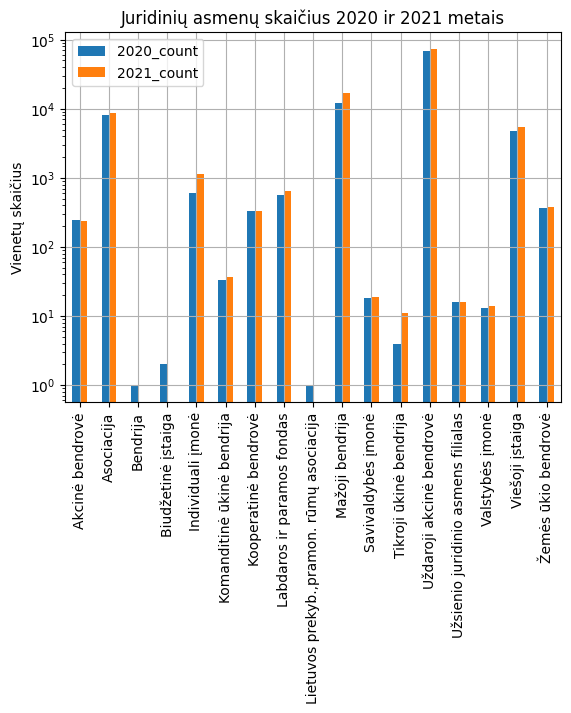

<IPython.core.display.Javascript object>

In [44]:
df_BLNS_group = df_BLNS.groupby(["form_pav", "metai"])[["obj_kodas"]].count().unstack()
df_BLNS_group.columns = df_BLNS_group.columns.droplevel()
df_BLNS_group.rename(columns={2020: "2020_count", 2021: "2021_count"}, inplace=True)

ax = df_BLNS_group.plot(
    kind="bar",
    logy=True,
    title="Juridinių asmenų skaičius 2020 ir 2021 metais",
    grid=True,
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
ax.set_ylabel("Vienetų skaičius")
ax.set_xlabel("")

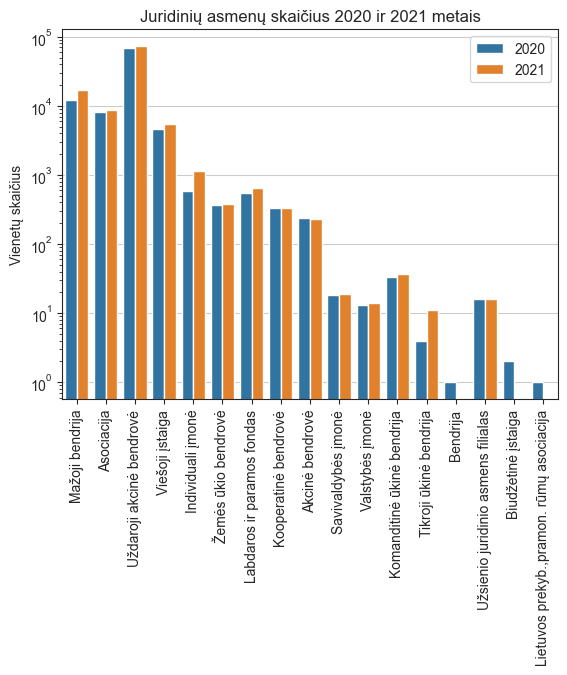

<IPython.core.display.Javascript object>

In [45]:
# form_pav_sort = df_BLNS['form_pav'].to_set().to_
sns.set_style("ticks", {"axes.grid": True})
ax = sns.countplot(data=df_BLNS, x="form_pav", hue="metai")
ax.tick_params(axis="x", rotation=90)
ax.set(yscale="log")
ax.set_ylabel("Vienetų skaičius")
ax.set_xlabel("")
ax.set_title("Juridinių asmenų skaičius 2020 ir 2021 metais")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])

## 10. Kurį mėnesį buvo įregistruota daugiausiai juridinių asmenų 2020 ir 2021 metais? Atvaizduokite stulpelinę diagramą.

In [46]:
df_PLNA_2020_month = df_PLNA_2020.copy()
df_PLNA_2020_month["reg_date"] = pd.to_datetime(df_PLNA_2020_month["reg_date"])

<IPython.core.display.Javascript object>

In [47]:
df_PLNA_2020_temp = (
    df_PLNA_2020_month[["reg_date"]]
    .groupby(df_PLNA_2020_month["reg_date"].dt.to_period("M"))
    .agg(Kiekis=("reg_date", "count"))
    .sort_values(by="Kiekis", ascending=False)
)
df_PLNA_2020_temp.head(1)

,Kiekis
reg_date,
2020-05,30688


<IPython.core.display.Javascript object>

__Išvada__: Daugiausiai 2020m. registruotų įmonių buvo gegužės mėnesį

<AxesSubplot: xlabel='reg_date'>

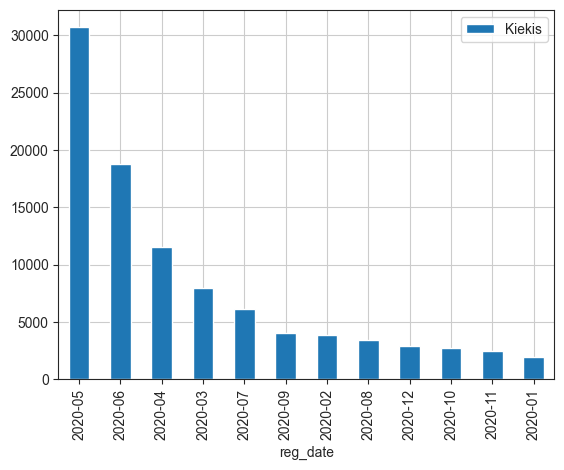

<IPython.core.display.Javascript object>

In [48]:
df_PLNA_2020_temp.plot(kind="bar")

In [49]:
df_PLNA_2021_month = df_PLNA_2021.copy()
df_PLNA_2021_month["reg_date"] = pd.to_datetime(df_PLNA_2021_month["reg_date"])

df_PLNA_2021_temp = (
    df_PLNA_2021_month[["reg_date"]]
    .groupby(df_PLNA_2021_month["reg_date"].dt.to_period("M"))
    .agg(Kiekis=("reg_date", "count"))
    .sort_values(by="Kiekis", ascending=False)
)
df_PLNA_2021_temp.head(1)

,Kiekis
reg_date,
2021-05,36096


<IPython.core.display.Javascript object>

__Išvada__: Daugiausiai 2021m. registruotų įmonių buvo gegužės mėnesį

<AxesSubplot: xlabel='reg_date'>

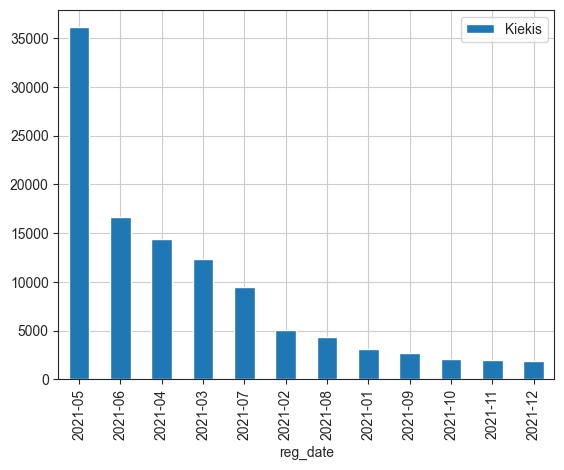

<IPython.core.display.Javascript object>

In [50]:
df_PLNA_2021_temp.plot(kind="bar")

## 11. Vizualiai atvaizduoti juridinių asmenų statuso pasiskirstymą kiekvienais metais.

In [51]:
df_BLNS_2020_temp = df_BLNS_2020[["form_pav"]].copy()
df_BLNS_2020_temp["metai"] = 2020

df_BLNS_2021_temp = df_BLNS_2021[["form_pav"]].copy()
df_BLNS_2021_temp["metai"] = 2021

df_BLNS_temp = pd.concat([df_BLNS_2020_temp, df_BLNS_2021_temp])

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Juridinių asmenų statuso pasiskirstymas 2020m. ir 2021m.')

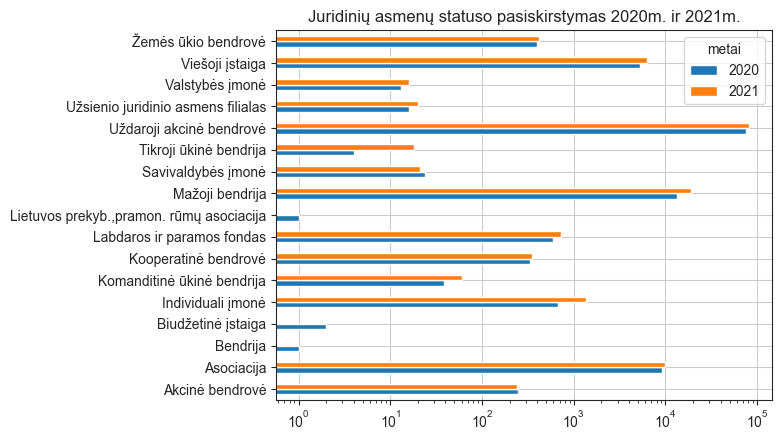

<IPython.core.display.Javascript object>

In [52]:
df_BLNS_group = (
    df_BLNS_temp.groupby(["form_pav", "metai"])["form_pav"].count().unstack()
)
ax = df_BLNS_group.plot.barh(logx=True)
ax.set_ylabel("")
ax.set_title("Juridinių asmenų statuso pasiskirstymas 2020m. ir 2021m.")

## 12. Kiekvienai įmonei apskaičiuoti tendenciją. Jei “grynasis_pelnas” + “nuosavas_kapitalas” 2021 metais buvo didesnis už 2020 metais deklaruotą, tai tendencija “teigiama”, jei ne - “neigiama”. Atvaizduoti tendencijos duomenis stulpelinėje diagramoje.

In [53]:
df_BL_PL_2020 = df_BLNS_2020[["obj_kodas", "obj_pav", "nuosavas_kapitalas"]].merge(
    df_PLNA_2020[["obj_kodas", "grynasis_pelnas"]], on="obj_kodas", how="outer"
)
df_BL_PL_2020["viso_2020"] = (
    df_BL_PL_2020["nuosavas_kapitalas"] + df_BL_PL_2020["grynasis_pelnas"]
)
# išmetame NaN reikšmes stulepiuose "nuosavas_kapitalas", "grynasis_pelnas", nes įmonės nepateikė
df_BL_PL_2020.drop(columns=["nuosavas_kapitalas", "grynasis_pelnas"], inplace=True)

df_BL_PL_2021 = df_BLNS_2021[["obj_kodas", "obj_pav", "nuosavas_kapitalas"]].merge(
    df_PLNA_2021[["obj_kodas", "grynasis_pelnas"]], on="obj_kodas", how="outer"
)
df_BL_PL_2021["viso_2021"] = (
    df_BL_PL_2021["nuosavas_kapitalas"] + df_BL_PL_2021["grynasis_pelnas"]
)
# išmetame NaN reikšmes stulepiuose "nuosavas_kapitalas", "grynasis_pelnas", nes įmonės nepateikė
df_BL_PL_2021.drop(columns=["nuosavas_kapitalas", "grynasis_pelnas"], inplace=True)

<IPython.core.display.Javascript object>

In [54]:
df_BL_PL = df_BL_PL_2020.merge(
    df_BL_PL_2021[["obj_kodas", "viso_2021"]], on="obj_kodas", how="outer"
)

<IPython.core.display.Javascript object>

In [55]:
df_BL_PL[df_BL_PL["obj_pav"].isna()]

,obj_kodas,obj_pav,viso_2020,viso_2021
152130,124256347,NaN,NaN,19.0
152131,124256347,NaN,NaN,19.0
152132,124256347,NaN,NaN,19.0
152133,124256347,NaN,NaN,19.0
152134,124256347,NaN,NaN,19.0
...,...,...,...,...
228892,301541937,NaN,NaN,2896.0
228893,305493272,NaN,NaN,1396.0
228894,305429608,NaN,NaN,97952.0
228895,305594047,NaN,NaN,-1160.0


<IPython.core.display.Javascript object>

In [56]:
df_BL_PL = df_BL_PL.dropna(subset=["obj_pav"])  # istrinamos imones be pavadinimo
df_BL_PL

,obj_kodas,obj_pav,viso_2020,viso_2021
0,305217929,"MB ""Jantaris""",3200.0,2208.0
1,304127368,"Alytaus neformaliojo švietimo centras ""Toleran...",NaN,NaN
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",-26224.0,-62042.0
3,191160250,"Kretingos sporto klubas ""Žalgiris""",NaN,NaN
4,304512862,"UAB ""Tedėja""",625832.0,631729.0
...,...,...,...,...
152125,302564216,"UAB ""Rizolta""",152686.0,162919.0
152126,300613091,"UAB ""Berta And""",194984.0,6564.0
152127,304213995,"UAB ""Kemo statyba""",420.0,-35479.0
152128,302640169,UAB TRANSOVITA,84080.0,164648.0


<IPython.core.display.Javascript object>

In [57]:
def set_tendencija(x):
    if x["viso_2021"] > x["viso_2020"]:
        return "teigiama"
    return "neigiama"


df_BL_PL["tendencija"] = df_BL_PL[["viso_2020", "viso_2021"]].apply(
    set_tendencija, axis=1
)
df_BL_PL

,obj_kodas,obj_pav,viso_2020,viso_2021,tendencija
0,305217929,"MB ""Jantaris""",3200.0,2208.0,neigiama
1,304127368,"Alytaus neformaliojo švietimo centras ""Toleran...",NaN,NaN,neigiama
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",-26224.0,-62042.0,neigiama
3,191160250,"Kretingos sporto klubas ""Žalgiris""",NaN,NaN,neigiama
4,304512862,"UAB ""Tedėja""",625832.0,631729.0,teigiama
...,...,...,...,...,...
152125,302564216,"UAB ""Rizolta""",152686.0,162919.0,teigiama
152126,300613091,"UAB ""Berta And""",194984.0,6564.0,neigiama
152127,304213995,"UAB ""Kemo statyba""",420.0,-35479.0,neigiama
152128,302640169,UAB TRANSOVITA,84080.0,164648.0,teigiama


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='tendencija', ylabel='Kiekis'>

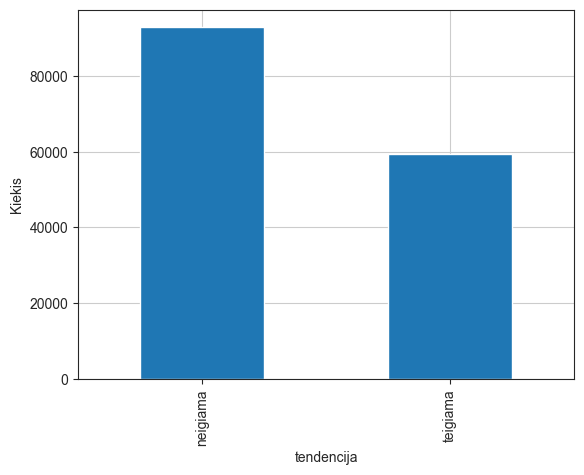

<IPython.core.display.Javascript object>

In [58]:
df_BL_PL.groupby("tendencija")["tendencija"].count().plot(kind="bar", ylabel="Kiekis")

## 13. Surasti UAB ir MB įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo. Bankrutavusių įmonių statusai: “Bankrutavęs”, “Bankrutuojantis”, “Išregistruotas”, “Inicijuojamas likvidavimas”, “Likviduojamas”, “Likviduojamas dėl bankroto”. Toliau veiklą vykdanti įmonė pažymėta "Teisinis stat neįregistruotas" statusu. Kokia bankrutavusių įmonių “nuosavas_kapitalas”suma 2021 metais? Kokia bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis. 

In [59]:
def find_unique_MB_UAB(df: pd.DataFrame):
    df["laikotarpis_iki"] = pd.to_datetime(df["laikotarpis_iki"])

    # 'Mažoji bendrija' = 310, 'Uždaroji akcinė bendrovė' = 960
    MB_UAB_kodai = [310, 960]

    # Išrenka tik MB ir UAB
    result = df[df["form_kodas"].isin(MB_UAB_kodai)]

    # Surušiuoja pagal įmonės kodą ir paskutinį užregistruotą laikotarpi_iki
    result = result.sort_values(by=["obj_kodas", "laikotarpis_iki"])

    # Išmeta dublikatus (pagal įmonės kodą), paliekant paskutinį užregistruotą laikotarpį
    result = result.drop_duplicates(subset="obj_kodas", keep="last")

    return result

<IPython.core.display.Javascript object>

In [60]:
df_BLNS_MB_UAB_2020 = find_unique_MB_UAB(df_BLNS_2020)
df_PLNA_MB_UAB_2020 = find_unique_MB_UAB(df_PLNA_2020)

df_BLNS_MB_UAB_2020.shape, df_PLNA_MB_UAB_2020.shape

((81374, 18), (81374, 16))

<IPython.core.display.Javascript object>

Tikriname ar Balanso ir Pelno(Nuostolio) duomenyse sutampa įmonių statusai

In [61]:
df_temp = df_BLNS_MB_UAB_2020[["obj_kodas", "obj_pav", "stat_statusas"]].merge(
    df_PLNA_MB_UAB_2020[["obj_kodas", "stat_statusas"]],
    on="obj_kodas",
    how="outer",
    suffixes=["_BLNS", "_PLNA"],
)
df_temp[df_temp["stat_statusas_BLNS"] != df_temp["stat_statusas_PLNA"]]

,obj_kodas,obj_pav,stat_statusas_BLNS,stat_statusas_PLNA


<IPython.core.display.Javascript object>

__Išvada__: Duomenų failuose df_BLNS_MB_UAB_2020 ir df_PLNA_MB_UAB_2020 statusai sutampa

----------

In [62]:
df_BLNS_MB_UAB_2021 = find_unique_MB_UAB(df_BLNS_2021)
df_PLNA_MB_UAB_2021 = find_unique_MB_UAB(df_PLNA_2021)

print(df_BLNS_MB_UAB_2021.shape, df_PLNA_MB_UAB_2021.shape)

df_temp = df_BLNS_MB_UAB_2021[["obj_kodas", "obj_pav", "stat_statusas"]].merge(
    df_PLNA_MB_UAB_2021[["obj_kodas", "stat_statusas"]],
    on="obj_kodas",
    how="outer",
    suffixes=["_BLNS", "_PLNA"],
)
df_temp[df_temp["stat_statusas_BLNS"] != df_temp["stat_statusas_PLNA"]]

(89983, 18) (89981, 16)


,obj_kodas,obj_pav,stat_statusas_BLNS,stat_statusas_PLNA
17973,258952330,"Uždaroji akcinė bendrovė ""PARAMA INVALIDAMS""",7,NaN
54714,304064576,"MB ""Vulpė""",0,NaN


<IPython.core.display.Javascript object>

__Išvada__: Tarp MB ir UAB 2021 metais BLNS ir PLNA statusai nesutampa keliuose įrašuose.
Įrašai bus pašalinti, nes nėra informacijos pelno arba balanso ataskaitose

In [63]:
drop_obj_kodas = df_temp.loc[
    df_temp["stat_statusas_BLNS"] != df_temp["stat_statusas_PLNA"], "obj_kodas"
]
df_BLNS_MB_UAB_2021 = df_BLNS_MB_UAB_2021[
    ~df_BLNS_MB_UAB_2021["obj_kodas"].isin(drop_obj_kodas)
]
df_PLNA_MB_UAB_2021 = df_PLNA_MB_UAB_2021[
    ~df_PLNA_MB_UAB_2021["obj_kodas"].isin(drop_obj_kodas)
]
df_BLNS_MB_UAB_2021.shape, df_PLNA_MB_UAB_2021.shape

((89981, 18), (89981, 16))

<IPython.core.display.Javascript object>

------

In [64]:
df_2020 = df_BLNS_MB_UAB_2020[["obj_kodas", "obj_pav", "stat_statusas", "stat_pav"]]

<IPython.core.display.Javascript object>

In [65]:
# 2020 metais įmonės vykdancios veiklą (Teisinis stat neįregistruotas = 0)
df_vykdo_2020 = df_2020[df_2020["stat_statusas"] == 0]
df_vykdo_2020.sample(5)

,obj_kodas,obj_pav,stat_statusas,stat_pav
82462,302963902,"UAB ""Deirada""",0,Teisinis stat neįregistruotas
45451,304412367,"UAB ""Vigitos prekyba""",0,Teisinis stat neįregistruotas
58120,145814766,"UAB ""Judra plius""",0,Teisinis stat neįregistruotas
46768,300610227,"UAB ""L.S.TRANS""",0,Teisinis stat neįregistruotas
42149,304862656,"UAB ""Du komponentai""",0,Teisinis stat neįregistruotas


<IPython.core.display.Javascript object>

In [66]:
# Surenkame 2021 metų duomenis į vieną df
df_2021 = df_BLNS_MB_UAB_2021[
    ["obj_kodas", "obj_pav", "stat_statusas", "stat_pav", "nuosavas_kapitalas"]
].merge(
    df_PLNA_MB_UAB_2021[["obj_kodas", "grynasis_pelnas"]], on="obj_kodas", how="outer"
)

<IPython.core.display.Javascript object>

In [67]:
# 2021 metais bankrutavusios arba vykdancios veiklą (statuso kodas nėra [1, 2, 3, 4, 8, 23, 24])
df_imones_2021 = df_2021[~df_2021["stat_statusas"].isin([1, 2, 3, 4, 8, 23, 24])]
df_imones_2021.sample(5)

,obj_kodas,obj_pav,stat_statusas,stat_pav,nuosavas_kapitalas,grynasis_pelnas
11027,148057179,"Uždaroji akcinė bendrovė ""EKTONAS""",0,Teisinis stat neįregistruotas,148239.0,14509.0
18270,281305150,UAB Mažoji Užupio klinika,0,Teisinis stat neįregistruotas,86530.0,45269.0
70920,304866512,"UAB ""Savaitgalis šiandien""",0,Teisinis stat neįregistruotas,-7497.0,1611.0
67447,304737282,UAB GM Žurnalų leidybos grupė,0,Teisinis stat neįregistruotas,-240000.0,60000.0
78540,305218326,"MB ""Epizodas""",0,Teisinis stat neįregistruotas,-3492.0,-1915.0


<IPython.core.display.Javascript object>

In [68]:
# Apjungiam 2020m. ir 2021m. duomenis pagal įmonės kodą
df_2020_2021 = df_vykdo_2020.merge(
    df_imones_2021[
        [
            "obj_kodas",
            "stat_statusas",
            "stat_pav",
            "nuosavas_kapitalas",
            "grynasis_pelnas",
        ]
    ],
    on="obj_kodas",
    how="left",
    suffixes=["_2020", "_2021"],
)
df_2020_2021 = df_2020_2021.dropna(subset=["stat_statusas_2021"])
df_2020_2021["stat_statusas_2021"] = df_2020_2021["stat_statusas_2021"].astype(np.int64)
df_2020_2021.sample(5)

,obj_kodas,obj_pav,stat_statusas_2020,stat_pav_2020,stat_statusas_2021,stat_pav_2021,nuosavas_kapitalas,grynasis_pelnas
45496,303184850,UAB Alstiko,0,Teisinis stat neįregistruotas,0,Teisinis stat neįregistruotas,13868.0,2235.0
4678,125475155,"UAB ""AKTYVUMO SPEKTRAS""",0,Teisinis stat neįregistruotas,0,Teisinis stat neįregistruotas,10413.0,0.0
29145,302422156,"UAB ""IGNOLITA & CO""",0,Teisinis stat neįregistruotas,0,Teisinis stat neįregistruotas,6730.0,643.0
65832,304782199,"""Altmedia"" UAB",0,Teisinis stat neįregistruotas,0,Teisinis stat neįregistruotas,194200.0,186335.0
7306,134937949,"Uždaroji akcinė bendrovė ""Spaudos praktika""",0,Teisinis stat neįregistruotas,0,Teisinis stat neįregistruotas,1540171.0,286493.0


<IPython.core.display.Javascript object>

In [69]:
# Patikriname ar visos MB ir UAB įmonės iš 2020m. turi statusus 2021 metais
df_2020_2021[["stat_statusas_2020", "stat_statusas_2021"]].value_counts(dropna=False)

stat_statusas_2020  stat_statusas_2021
0                   0                     70647
dtype: int64

<IPython.core.display.Javascript object>

In [70]:
# Pašalimane įmones, kurių 2021m. statusas nežinomas
df_2020_2021 = df_2020_2021.dropna(subset=["stat_statusas_2021"])
df_2020_2021["stat_statusas_2021"] = df_2020_2021["stat_statusas_2021"].astype(np.int64)

<IPython.core.display.Javascript object>

In [71]:
df_bankrutavusios = df_2020_2021[
    df_2020_2021["stat_statusas_2020"] != df_2020_2021["stat_statusas_2021"]
]
df_bankrutavusios

,obj_kodas,obj_pav,stat_statusas_2020,stat_pav_2020,stat_statusas_2021,stat_pav_2021,nuosavas_kapitalas,grynasis_pelnas


<IPython.core.display.Javascript object>

__Išvada__: Nėra 2020m veikusių, o 2021 bankrutavusių UAB ir MB įmonių

In [72]:
veikianciu_nuosavas_kapitalas = df_2020_2021["nuosavas_kapitalas"].sum()
veikianciu_grynasis_pelnas = df_2020_2021["grynasis_pelnas"].sum()
print(
    f"Veikiančių MB ir UAB įmonių nuosavas kapitalas: {veikianciu_nuosavas_kapitalas:,.0f}"
)
print(f"Veikiančių MB ir UAB įmonių grynasis pelnas: {veikianciu_grynasis_pelnas:,.0f}")

Veikiančių MB ir UAB įmonių nuosavas kapitalas: 53,004,966,154
Veikiančių MB ir UAB įmonių grynasis pelnas: 5,149,581,016


<IPython.core.display.Javascript object>

## 14. Sukurti naują stulpelį “turtas”, kuris skaičiuojamas sudedant “trumpalaikis_turtas” ir “ilgalaikis_turtas”

In [73]:
df_BLNS_2020["turtas"] = df_BLNS_2020.apply(
    lambda x: x["trumpalaikis_turtas"] + x["ilgalaikis_turtas"], axis=1
)
df_BLNS_2020.sample(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,metai,turtas
64382,305231793,"UAB ""Stagelita""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-08-21,2019-12-31,2020-04-09,1173.0,67791.0,67205.0,1759.0,2020,68964.0
18175,304929635,"VšĮ ""Bilietų nėra""",570,Viešoji įstaiga,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,2019-01-01,2019-12-31,2020-04-07,10.0,0.0,0.0,48.0,2020,48.0
37280,148417976,"UAB ""Programmatus""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-06-01,33382.0,88728.0,4391.0,117324.0,2020,121715.0
61367,304607260,"UAB ""Transgoldas""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-05-29,-6293.0,6440.0,144.0,3.0,2020,147.0
67533,303550397,"UAB ""Smilgius""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),2019-01-01,2019-12-31,2020-05-28,61578.0,67331.0,7618.0,120516.0,2020,128134.0


<IPython.core.display.Javascript object>

In [74]:
bins = [-np.infty, 3_000, 20_000, 35_000, 70_000, np.infty]
bins_labels = ["iki 3k", "3k-20k", "20k-35k", "35k-70k", "70k+"]
df_BLNS_2020["turto_grupe"] = pd.cut(
    df_BLNS_2020["turtas"], bins=bins, labels=bins_labels
)
df_turtas_2020 = df_BLNS_2020[["turto_grupe"]].value_counts()
df_turtas_2020

turto_grupe
70k+           41488
3k-20k         21613
iki 3k         21128
35k-70k        11599
20k-35k         9051
dtype: int64

<IPython.core.display.Javascript object>

In [75]:
df_BLNS_2021["turtas"] = df_BLNS_2021.apply(
    lambda x: x["trumpalaikis_turtas"] + x["ilgalaikis_turtas"], axis=1
)
df_BLNS_2021.sample(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,metai,turtas
80229,300539463,"UAB ""Dentmeda""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),2020-01-01,2020-12-31,2021-04-06,154101.0,30166.0,104486.0,79098.0,2021,183584.0
79289,177406566,"Uždaroji akcinė bendrovė ""ELDENĖ""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2020-01-01,2020-12-31,2021-05-25,-106124.0,231292.0,44550.0,87873.0,2021,132423.0
89235,303157351,"Melioracijos sistemų naudotojų asociacija ""Paš...",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,2020-01-01,2020-12-31,2021-07-22,0.0,0.0,205238.0,89.0,2021,205327.0
17705,304771459,Klaipėdos Tarptautinis Rotaract klubas,630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,2019-01-01,2019-12-31,2021-04-15,0.0,0.0,0.0,2233.0,2021,2233.0
51254,300008249,"UAB ""GA PROJEKTAI""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),2019-01-01,2019-12-31,2021-07-28,49787.0,55543.0,33805.0,70204.0,2021,104009.0


<IPython.core.display.Javascript object>

In [76]:
df_BLNS_2021["turto_grupe"] = pd.cut(
    df_BLNS_2021["turtas"], bins=bins, labels=bins_labels
)
df_turtas_2021 = df_BLNS_2021[["turto_grupe"]].value_counts()
df_turtas_2021

turto_grupe
70k+           46274
3k-20k         24735
iki 3k         24517
35k-70k        13087
20k-35k        10279
dtype: int64

<IPython.core.display.Javascript object>

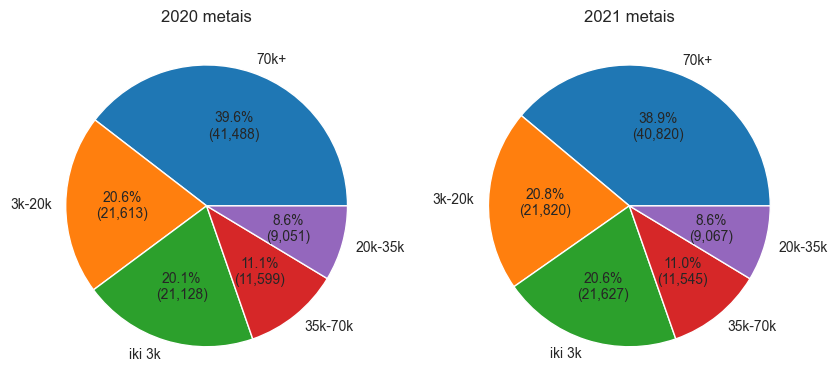

<IPython.core.display.Javascript object>

In [77]:
viso = df_turtas_2020.sum()


def proc_and_absolute_value(x):
    proc = x
    val = x * viso / 100
    return f"{proc:.1f}%\n({val:,.0f})"


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

labels_2020 = [x[0] for x in df_turtas_2020.index]
labels_2021 = [x[0] for x in df_turtas_2021.index]

ax[0].pie(df_turtas_2020, labels=labels_2020, autopct=proc_and_absolute_value)
ax[0].set_title("2020 metais")

ax[1] = df_turtas_2021.plot(
    y="turto_grupe",
    kind="pie",
    labels=labels_2021,
    title="2021 metais",
    ylabel="",
    autopct=proc_and_absolute_value,
)

## 15. Rasti TOP-100 pelningiausių įmonių pagal “grynasis pelnas” ir TOP-100 įmonių, kurių “nuosavas kapitalas” didžiausias. Ar yra sutampančių įmonių šiuose sąrašuose? Skaičiuojant TOP įmonės įtraukti viso laikotarpio įmones (naudoti 2020 ir 2021 metų duomenis kartu).

In [78]:
df_BLNS_2020["metai"] = 2020
df_BLNS_2021["metai"] = 2021
df_BLNS = pd.concat([df_BLNS_2020, df_BLNS_2021])
Top100_kapitalas = (
    df_BLNS.groupby(["obj_pav"])[["nuosavas_kapitalas"]]
    .mean()
    .sort_values(by="nuosavas_kapitalas", ascending=False)
    .head(100)
)
Top100_kapitalas

,nuosavas_kapitalas
obj_pav,
Valstybės įmonė Lietuvos automobilių kelių direkcija,2.693140e+09
"UAB ""Thermo Fisher Scientific Vector Holdings""",2.619317e+09
"UAB ""Thermo Fisher Scientific Vector Senior Holdings I""",2.619317e+09
"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",1.804312e+09
"UAB ""Thermo Fisher Scientific Vector Senior Holdings II""",1.590589e+09
...,...
Circle K Lietuva UAB,7.745149e+07
"Akcinė bendrovė ""KLAIPĖDOS MEDIENA""",7.495343e+07
"UAB ""CGP Management""",7.482410e+07


<IPython.core.display.Javascript object>

In [79]:
df_PLNA_2020["metai"] = 2020
df_PLNA_2021["metai"] = 2021

df_PLNA = pd.concat([df_PLNA_2020, df_PLNA_2021])
Top100_pelnas = (
    df_PLNA.groupby(["obj_pav"])[["grynasis_pelnas"]]
    .mean()
    .sort_values(by="grynasis_pelnas", ascending=False)
    .head(100)
)
Top100_pelnas

,grynasis_pelnas
obj_pav,
"UAB ""Thermo Fisher Scientific Baltics""",326035597.5
MAXIMA LT UAB,151670500.0
"AB ""Ignitis grupė""",73395000.0
"UAB ""ME investicija""",62657674.0
"UAB ""TELE2""",60717000.0
...,...
"Uždaroji akcinė bendrovė ""HOPTRANSA""",7037687.0
Estoty Vilnius UAB,7029127.0
Apple Lithuania UAB,6937525.5


<IPython.core.display.Javascript object>

In [80]:
Top100_kapitalas_imones = set(Top100_kapitalas.index)
Top100_pelnas_imones = set(Top100_pelnas.index)
len(Top100_kapitalas_imones.intersection(Top100_pelnas_imones))

41

<IPython.core.display.Javascript object>

__Išvada__: yra sutampančių įmonių tarp Top100 pelningiausių ir turtigiausių (pagal kapitalą)

## 16. Ar TOP įmonės pagal “grynasis pelnas” iš 15 užduoties skiriasi pagal metus, t.y. 2020 ir 2021 metais? Kurios įmonės iškrenta iš TOP sąrašo 2021 metais?

In [81]:
pelnas_top100_2020 = (
    df_PLNA_2020.groupby(["obj_pav"])[["grynasis_pelnas"]]
    .mean()
    .sort_values(by="grynasis_pelnas", ascending=False)
    .head(100)
)
pelnas_top100_2021 = (
    df_PLNA_2021.groupby(["obj_pav"])[["grynasis_pelnas"]]
    .mean()
    .sort_values(by="grynasis_pelnas", ascending=False)
    .head(100)
)
imones_2020 = set(pelnas_top100_2020.index)
imones_2021 = set(pelnas_top100_2021.index)
len(imones_2020 & imones_2021)

57

<IPython.core.display.Javascript object>

__Išvada__: TOP įmonės pagal "grynasis pelnas" skiriasi pagal metus (2020m. ir 2021m.), t.y. skiriasi 57 įmonėmis

Įmonės, kurios buvo 2020 TOP100'e, o 2021 neliko

In [82]:
list(imones_2020 - imones_2021)

['UAB "Klaško"',
 'Valstybės įmonė Lietuvos oro uostai',
 'Uždarojo tipo informuotiesiems investuotojams skirta investicinė bendrovė UAB "LIM Verslo Trikampio NT Fondas"',
 'MAXIMA International Sourcing UAB',
 'Uždaroji akcinė bendrovė "Nemuno vaistinė"',
 'Uždarojo tipo informuotiesiems investuotojams skirta investicinė bendrovė UAB "Verslo trikampis"',
 'UAB "RAY Investments"',
 'UAB Gren Klaipėda',
 'UAB "Panorama LT"',
 'MD PARTNERS UAB',
 'UAB "ME HOLDING NT"',
 'UAB "Inter Krasta"',
 'UAB "OLIFĖJA"',
 'Uždaroji akcinė bendrovė "LITESKO"',
 'UAB "CIE LT FORGE"',
 'Akcinė bendrovė "Invalda INVL"',
 'UAB "Daltonas"',
 'Silver Screen Holdings UAB',
 'AB "BALTIC SHOPPING CENTERS"',
 'UAB "ERA Family"',
 'UAB "HEKON"',
 'UAB "Trust Capital"',
 'UAB "Schage Real Estate"',
 'Uždaroji akcinė bendrovė "NESTE LIETUVA"',
 'UAB "Sorensen Invest"',
 'AB "Amber Grid"',
 '4Wind UAB',
 'MG investment UAB',
 'UAB LIVE SQUARE LT',
 'Technopolis Lietuva UAB',
 'UAB "FELIT"',
 'Uždaroji akcinė bendr

<IPython.core.display.Javascript object>

# Trečia dalis

## 3.0. Duomenų importas ir tvarkymas

In [83]:
import zipfile

<IPython.core.display.Javascript object>

In [84]:
# linkas = "https://atvira.sodra.lt/imones/downloads/2019/monthly-2019.csv.zip"
# linkas = "https://atvira.sodra.lt/imones/downloads/2019/monthly-2019.json.zip"
linkas2020 = "./data/monthly-2019.csv.zip"
linkas2021 = "./data/monthly-2020.csv.zip"

with zipfile.ZipFile(linkas2020) as zip_csv:
    with zip_csv.open("monthly-2019.csv") as csv_file:
        df_sodra_2020 = pd.read_csv(csv_file, sep=";")

with zipfile.ZipFile(linkas2021) as zip_csv:
    with zip_csv.open("monthly-2020.csv") as csv_file:
        df_sodra_2021 = pd.read_csv(csv_file, sep=";")

<IPython.core.display.Javascript object>

In [85]:
new_columns_names = {
    "Draudėjo kodas (code)": "code",
    "Juridinių asmenų registro kodas (jarCode)": "obj_kodas",
    "Pavadinimas (name)": "obj_pav",
    "Savivaldybė, kurioje registruota(municipality)": "savivaldybe",
    "Ekonominės veiklos rūšies kodas(ecoActCode)": "veiklos_kodas",
    "Ekonominės veiklos rūšies pavadinimas(ecoActName)": "veiklos_aprasymas",
    "Mėnuo (month)": "menuo",
    "Vidutinis darbo užmokestis (avgWage)": "vid_atlyginimas",
    "Apdraustųjų skaičius (numInsured)": "darbuotoju_skaicius",
    "Vidutinis darbo užmokestis II (avgWage2)": "vid_atlyginimas_II",
    "Apdraustųjų skaičius II (numInsured2)": "darbuotoju_skaicius_II",
    "Valstybinio socialinio draudimo įmoka (tax)": "sodros_imoka",
}
df_sodra_2020.rename(columns=new_columns_names, inplace=True)
df_sodra_2021.rename(columns=new_columns_names, inplace=True)

<IPython.core.display.Javascript object>

> sutampančių ir nesutampančių įmonių kodų tarp BLNS ir Sodra duomenų

In [86]:
BLNS = set(df_BLNS_2020["obj_kodas"])
sodra = set(df_sodra_2020["obj_kodas"])

len(BLNS), len(BLNS - sodra), len(BLNS.intersection(sodra)), len(sodra)

(96353, 22857, 73496, 110861)

<IPython.core.display.Javascript object>

__Pastaba__: imsiu tik tas įmones, kurios yra BLNS duomenų masyve 

In [87]:
def tvarkyti_sodra(df: pd.DataFrame):
    # pašalinam įmones be įmonės kodo
    df_1 = df[~df["obj_kodas"].isna()]
    df_1 = df_1.sort_values(["obj_kodas", "menuo"])

    # išrenkame paskutinį įmonės įrašą metuose
    result = df_1.groupby("obj_kodas").last().sort_values("obj_kodas").reset_index()

    return result


df_sodra_2020 = tvarkyti_sodra(df_sodra_2020)
df_sodra_2021 = tvarkyti_sodra(df_sodra_2021)

<IPython.core.display.Javascript object>

In [88]:
def tvarkyti_PLNS_BLNA(df: pd.DataFrame):
    #     df["laikotarpis_nuo"] = pd.to_datetime(df["laikotarpis_nuo"], format="%Y-%m-%d")
    df["laikotarpis_iki"] = pd.to_datetime(df["laikotarpis_iki"], format="%Y-%m-%d")
    df["reg_date"] = pd.to_datetime(df["reg_date"], format="%Y-%m-%d")

    # paliekam tik tuos įrašus, kuriu laikotarpis_iki yra ataskaitos metai
    metai = df["reg_date"].max().year - 1
    df_1 = df[df["laikotarpis_iki"].dt.year == metai]

    # paliekame tik įmonės paskutinius įrašus
    result = (
        df_1.sort_values(["obj_kodas", "laikotarpis_iki"])
        .groupby("obj_kodas")
        .last()
        .reset_index()
    )

    return result


df_BLNS_2020 = tvarkyti_PLNS_BLNA(df_BLNS_2020)
df_BLNS_2021 = tvarkyti_PLNS_BLNA(df_BLNS_2021)
df_PLNA_2020 = tvarkyti_PLNS_BLNA(df_PLNA_2020)
df_PLNA_2021 = tvarkyti_PLNS_BLNA(df_PLNA_2021)

<IPython.core.display.Javascript object>

In [89]:
df_temp = df_BLNS_2020[
    [
        "obj_kodas",
        "obj_pav",
        "form_pav",
        "nuosavas_kapitalas",
        "mok_sumos_ir_isipareigojimai",
        "ilgalaikis_turtas",
        "trumpalaikis_turtas",
    ]
].merge(
    df_sodra_2020[
        [
            "obj_kodas",
            "veiklos_kodas",
            "veiklos_aprasymas",
            "savivaldybe",
            "vid_atlyginimas",
            "darbuotoju_skaicius",
        ]
    ],
    on="obj_kodas",
    how="inner",
)

<IPython.core.display.Javascript object>

In [90]:
df_2020 = df_temp.merge(
    df_PLNA_2020[["obj_kodas", "pardavimo_pajamos", "grynasis_pelnas"]],
    on="obj_kodas",
    how="inner",
)

<IPython.core.display.Javascript object>

In [91]:
df_temp = df_BLNS_2021[
    [
        "obj_kodas",
        "obj_pav",
        "form_pav",
        "nuosavas_kapitalas",
        "mok_sumos_ir_isipareigojimai",
        "ilgalaikis_turtas",
        "trumpalaikis_turtas",
    ]
].merge(
    df_sodra_2021[
        [
            "obj_kodas",
            "veiklos_kodas",
            "veiklos_aprasymas",
            "savivaldybe",
            "vid_atlyginimas",
            "darbuotoju_skaicius",
        ]
    ],
    on="obj_kodas",
    how="inner",
)

<IPython.core.display.Javascript object>

In [92]:
df_2021 = df_temp.merge(
    df_PLNA_2021[["obj_kodas", "pardavimo_pajamos", "grynasis_pelnas"]],
    on="obj_kodas",
    how="inner",
)

<IPython.core.display.Javascript object>

In [93]:
df_visa = df_2020.merge(
    df_2021[
        [
            "obj_kodas",
            "nuosavas_kapitalas",
            "mok_sumos_ir_isipareigojimai",
            "ilgalaikis_turtas",
            "trumpalaikis_turtas",
            "pardavimo_pajamos",
            "grynasis_pelnas",
            "vid_atlyginimas",
            "darbuotoju_skaicius",
        ]
    ],
    on="obj_kodas",
    how="outer",
    suffixes=["_20", "_21"],
)

<IPython.core.display.Javascript object>

In [94]:
df_visa = df_visa[
    [
        "obj_kodas",
        "obj_pav",
        "form_pav",
        "veiklos_kodas",
        "veiklos_aprasymas",
        "savivaldybe",
        "nuosavas_kapitalas_20",
        "mok_sumos_ir_isipareigojimai_20",
        "ilgalaikis_turtas_20",
        "trumpalaikis_turtas_20",
        "pardavimo_pajamos_20",
        "grynasis_pelnas_20",
        "vid_atlyginimas_20",
        "darbuotoju_skaicius_20",
        "nuosavas_kapitalas_21",
        "mok_sumos_ir_isipareigojimai_21",
        "ilgalaikis_turtas_21",
        "trumpalaikis_turtas_21",
        "pardavimo_pajamos_21",
        "grynasis_pelnas_21",
        "vid_atlyginimas_21",
        "darbuotoju_skaicius_21",
    ]
]

<IPython.core.display.Javascript object>

In [95]:
df_visa.head()

,obj_kodas,obj_pav,form_pav,veiklos_kodas,veiklos_aprasymas,savivaldybe,nuosavas_kapitalas_20,mok_sumos_ir_isipareigojimai_20,ilgalaikis_turtas_20,trumpalaikis_turtas_20,...,vid_atlyginimas_20,darbuotoju_skaicius_20,nuosavas_kapitalas_21,mok_sumos_ir_isipareigojimai_21,ilgalaikis_turtas_21,trumpalaikis_turtas_21,pardavimo_pajamos_21,grynasis_pelnas_21,vid_atlyginimas_21,darbuotoju_skaicius_21
0,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""",Uždaroji akcinė bendrovė,682000.0,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,1781906.0,91432.0,382464.0,1490380.0,...,NaN,2.0,1755061.0,23498.0,356897.0,1421293.0,85522.0,33153.0,NaN,2.0
1,110004884,"Uždaroji akcinė bendrovė ""VILLON""",Uždaroji akcinė bendrovė,551000.0,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus r. sav.,2993187.0,37702011.0,40070639.0,648384.0,...,1401.75,211.0,2779511.0,37446848.0,39827601.0,457092.0,3111102.0,-213676.0,945.27,148.0
2,110005648,"UAB ""Informacinės paslaugos""",Uždaroji akcinė bendrovė,620000.0,"Kompiuterių programavimo, konsultacinė ir susi...",Vilniaus m. sav.,711851.0,530251.0,89119.0,1125057.0,...,2220.77,54.0,662043.0,707609.0,53300.0,1262390.0,2657795.0,-49808.0,1500.84,41.0
3,110006892,"Uždaroji akcinė bendrovė ""Londvil""",Uždaroji akcinė bendrovė,682000.0,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,175256.0,21719.0,86608.0,17204.0,...,NaN,2.0,186454.0,23485.0,172775.0,36828.0,107640.0,16198.0,NaN,2.0
4,110008377,"Uždaroji akcinė bendrovė ""KOMPONENTAS""",Uždaroji akcinė bendrovė,682000.0,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,813517.0,1974318.0,2460243.0,327592.0,...,1297.04,4.0,836345.0,592593.0,665165.0,763773.0,2162155.0,119110.0,1506.25,4.0


<IPython.core.display.Javascript object>

In [96]:
df_visa.shape

(81981, 22)

<IPython.core.display.Javascript object>

In [97]:
df_visa.columns

Index(['obj_kodas', 'obj_pav', 'form_pav', 'veiklos_kodas',
       'veiklos_aprasymas', 'savivaldybe', 'nuosavas_kapitalas_20',
       'mok_sumos_ir_isipareigojimai_20', 'ilgalaikis_turtas_20',
       'trumpalaikis_turtas_20', 'pardavimo_pajamos_20', 'grynasis_pelnas_20',
       'vid_atlyginimas_20', 'darbuotoju_skaicius_20', 'nuosavas_kapitalas_21',
       'mok_sumos_ir_isipareigojimai_21', 'ilgalaikis_turtas_21',
       'trumpalaikis_turtas_21', 'pardavimo_pajamos_21', 'grynasis_pelnas_21',
       'vid_atlyginimas_21', 'darbuotoju_skaicius_21'],
      dtype='object')

<IPython.core.display.Javascript object>

## 3.1. Išsiaiškinkite micro ir mažos įmonės apibrėžimą.

Linkas [micro ir mažos įmonės](https://www.infolex.lt/ta/43747:str3#)

## 3.2. Remdamiesi apibrėžimu išfiltruokite micro ir mažas įmones. Įmonės turi turėti statusą MB arba UAB.

In [98]:
df_visa["form_pav"].isna().sum()

11061

<IPython.core.display.Javascript object>

Įrašus be formos pavadinimo išmetu

In [99]:
df_visa_temp = df_visa[df_visa["form_pav"].notna()]

<IPython.core.display.Javascript object>

In [100]:
MB_UAB = "|".join(["Mažoji bendrija", "Uždaroji akcinė bendrovė"])
df_MB_UAB = df_visa_temp[df_visa_temp["form_pav"].str.contains(MB_UAB)]

<IPython.core.display.Javascript object>

In [101]:
darbuotojai = df_MB_UAB["darbuotoju_skaicius_21"]
pajamos = df_MB_UAB["pardavimo_pajamos_21"]
turtas = df_MB_UAB["ilgalaikis_turtas_21"] + df_MB_UAB["trumpalaikis_turtas_21"]

mikro_imone = (darbuotojai < 10) & ((pajamos < 2_000_000) | (turtas <= 2_000_000))
maza_imone = (darbuotojai < 50) & ((pajamos < 10_000_000) | (turtas <= 10_000_000))

df_mikro_maza = df_MB_UAB[mikro_imone | maza_imone]
df_mikro_maza.head()

,obj_kodas,obj_pav,form_pav,veiklos_kodas,veiklos_aprasymas,savivaldybe,nuosavas_kapitalas_20,mok_sumos_ir_isipareigojimai_20,ilgalaikis_turtas_20,trumpalaikis_turtas_20,...,vid_atlyginimas_20,darbuotoju_skaicius_20,nuosavas_kapitalas_21,mok_sumos_ir_isipareigojimai_21,ilgalaikis_turtas_21,trumpalaikis_turtas_21,pardavimo_pajamos_21,grynasis_pelnas_21,vid_atlyginimas_21,darbuotoju_skaicius_21
0,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""",Uždaroji akcinė bendrovė,682000.0,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,1781906.0,91432.0,382464.0,1490380.0,...,NaN,2.0,1755061.0,23498.0,356897.0,1421293.0,85522.0,33153.0,NaN,2.0
2,110005648,"UAB ""Informacinės paslaugos""",Uždaroji akcinė bendrovė,620000.0,"Kompiuterių programavimo, konsultacinė ir susi...",Vilniaus m. sav.,711851.0,530251.0,89119.0,1125057.0,...,2220.77,54.0,662043.0,707609.0,53300.0,1262390.0,2657795.0,-49808.0,1500.84,41.0
3,110006892,"Uždaroji akcinė bendrovė ""Londvil""",Uždaroji akcinė bendrovė,682000.0,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,175256.0,21719.0,86608.0,17204.0,...,NaN,2.0,186454.0,23485.0,172775.0,36828.0,107640.0,16198.0,NaN,2.0
4,110008377,"Uždaroji akcinė bendrovė ""KOMPONENTAS""",Uždaroji akcinė bendrovė,682000.0,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,813517.0,1974318.0,2460243.0,327592.0,...,1297.04,4.0,836345.0,592593.0,665165.0,763773.0,2162155.0,119110.0,1506.25,4.0
8,110013748,Bendra Lietuvos JAV ir Rusijos įmonė uždaroji ...,Uždaroji akcinė bendrovė,464900.0,Kitų namų ūkio reikmenų didmeninė prekyba,Kauno m. sav.,193724.0,52483.0,147185.0,97165.0,...,1005.85,9.0,213497.0,86977.0,162855.0,135766.0,229124.0,19773.0,1234.07,9.0


<IPython.core.display.Javascript object>

In [102]:
print(
    f"Viso MB ir UAB: {len(df_MB_UAB):d}\nTarp jų mikro ir mazų: {len(df_mikro_maza):d}"
)

Viso MB ir UAB: 66279
Tarp jų mikro ir mazų: 56943


<IPython.core.display.Javascript object>

## 3.3.  Indentifikuokite labiausiai augusias įmones.

In [103]:
df_mikro_maza["darbuotoju_skaicius_20"].fillna(0, inplace=True)
df_mikro_maza["darbuotoju_skaicius_21"].fillna(0, inplace=True)

df_mikro_maza["darbuotoju_pokytis"] = (
    df_mikro_maza["darbuotoju_skaicius_21"] - df_mikro_maza["darbuotoju_skaicius_20"]
)
df_mikro_maza["pajamos_pokytis"] = (
    df_mikro_maza["pardavimo_pajamos_21"] - df_mikro_maza["pardavimo_pajamos_20"]
)
df_mikro_maza["ilg_turtas_pokytis"] = (
    df_mikro_maza["ilgalaikis_turtas_21"] - df_mikro_maza["ilgalaikis_turtas_20"]
)
df_mikro_maza["vid_atlyginimas_pokytis"] = (
    df_mikro_maza["vid_atlyginimas_21"] - df_mikro_maza["vid_atlyginimas_20"]
)
df_mikro_maza["isipareigojimai_pokytis"] = (
    df_mikro_maza["vid_atlyginimas_21"] - df_mikro_maza["vid_atlyginimas_20"]
)


df_rez = df_mikro_maza[
    [
        "obj_kodas",
        "obj_pav",
        "darbuotoju_pokytis",
        "pajamos_pokytis",
        "ilg_turtas_pokytis",
        "vid_atlyginimas_pokytis",
        "isipareigojimai_pokytis",
    ]
]

C:\Users\Irmantas\AppData\Local\Temp\ipykernel_3184\2753277514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mikro_maza["darbuotoju_skaicius_20"].fillna(0, inplace=True)
C:\Users\Irmantas\AppData\Local\Temp\ipykernel_3184\2753277514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mikro_maza["darbuotoju_skaicius_21"].fillna(0, inplace=True)
C:\Users\Irmantas\AppData\Local\Temp\ipykernel_3184\2753277514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

<IPython.core.display.Javascript object>

Paskaičiuoju kiekvieno pokyčio kvantilius (0.1 ir 0.9)
Jei pokytis nepapuola į kvantilių intervalą skaitau kad įmonė nusišypsojo "sėkmė". Tokias įmones atmetu

In [105]:
q_columns = [
    "darbuotoju_pokytis",
    "pajamos_pokytis",
    "ilg_turtas_pokytis",
    "vid_atlyginimas_pokytis",
    "isipareigojimai_pokytis",
]
q = df_rez.quantile(np.array([0.1, 0.9]), numeric_only=True)[q_columns]
q

,darbuotoju_pokytis,pajamos_pokytis,ilg_turtas_pokytis,vid_atlyginimas_pokytis,isipareigojimai_pokytis
0.1,-2.0,-151929.0,-23167.2,-171.547,-171.547
0.9,2.0,174480.0,28613.6,385.058,385.058


<IPython.core.display.Javascript object>

In [107]:
df_rez2 = df_rez
for col in q_columns:
    df_rez2 = df_rez2[
        ((df_rez2[col] >= q.loc[0.1, col]) & (df_rez2[col] <= q.loc[0.9, col]))
    ]
# df_rez2

<IPython.core.display.Javascript object>

Suskaičiuoju kiekvieno pokyčio rangą ir bendrą rangą (visų rangų suma)
Kuo bendras rangas mažesnis, tuo įmonė labiausiai paaugo

In [108]:
df_rez2["pajamos_pokytis_rank"] = df_rez2[["pajamos_pokytis"]].rank(ascending=False)
df_rez2["ilg_turtas_pokytis_rank"] = df_rez2[["ilg_turtas_pokytis"]].rank(ascending=False)
df_rez2["vid_atlyginimas_pokytis_rank"] = df_rez2[["vid_atlyginimas_pokytis"]].rank(ascending=False)
df_rez2["isipareigojimai_pokytis_rank"] = df_rez2[["isipareigojimai_pokytis"]].rank()
df_rez2['bendras_rank'] = df_rez2["pajamos_pokytis_rank"] + df_rez2["ilg_turtas_pokytis_rank"] + df_rez2["isipareigojimai_pokytis_rank"] + df_rez2["isipareigojimai_pokytis_rank"]


<IPython.core.display.Javascript object>

In [109]:
print("---- Top10 geriausių įmonių --------")
df_rez2.sort_values("bendras_rank")[
    [
        "obj_kodas",
        "obj_pav",
        "darbuotoju_pokytis",
        "pajamos_pokytis",
        "ilg_turtas_pokytis",
        "vid_atlyginimas_pokytis",
        "isipareigojimai_pokytis",
        "bendras_rank",
    ]
].head(10)

---- Top10 geriausių įmonių --------


,obj_kodas,obj_pav,darbuotoju_pokytis,pajamos_pokytis,ilg_turtas_pokytis,vid_atlyginimas_pokytis,isipareigojimai_pokytis,bendras_rank
51439,303992433,"UAB ""Aitrena""",-1.0,106680.0,26497.0,-135.79,-135.79,1226.0
36930,302660086,"UAB ""Grundotech""",0.0,172125.0,14121.0,-141.68,-141.68,1230.0
33425,302533320,Forstila UAB,0.0,110395.0,23434.0,-126.12,-126.12,1483.0
37677,302685207,"UAB ""REZETAS KL""",0.0,151300.0,11452.0,-135.14,-135.14,1671.0
62559,304738815,"UAB ""Agrava""",2.0,123261.0,27926.0,-106.96,-106.96,1713.0
52632,304075722,"UAB ""Vilgintė""",1.0,75063.0,13343.0,-166.04,-166.04,1965.0
27367,301635945,"UAB ""HIPERIONAS""",0.0,77728.0,19713.0,-133.93,-133.93,2058.0
69997,305235432,"MB ""Ragas""",2.0,168432.0,20634.0,-91.77,-91.77,2151.0
67358,304989550,"UAB ""Pastato sistemos""",2.0,111793.0,10968.0,-124.47,-124.47,2295.5
45652,303159473,"UAB ""Pilis IT""",2.0,130027.0,23877.0,-89.56,-89.56,2328.0


<IPython.core.display.Javascript object>

In [110]:
!pip freeze > requirements1.txt

<IPython.core.display.Javascript object>